In [216]:
import fsspec
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap,shiftgrid
import math
from matplotlib import colors as c

In [16]:
#读数据
filepath = 'https://power-analysis-ready-datastore.s3.amazonaws.com/power_901_monthly_radiation_utc.zarr'
filepath_mapped = fsspec.get_mapper(filepath)
ds = xr.open_zarr(store=filepath_mapped, consolidated=True)
ds

<xarray.Dataset>
Dimensions:                  (time: 468, lat: 180, lon: 360)
Coordinates:
  * lat                      (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                      (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * time                     (time) datetime64[ns] 1984-01-31 ... 2022-12-31
Data variables: (12/209)
    AIRMASS                  (time, lat, lon) float64 ...
    ALLSKY_KT                (time, lat, lon) float64 ...
    ALLSKY_KT_MAX            (time, lat, lon) float64 ...
    ALLSKY_KT_MIN            (time, lat, lon) float64 ...
    ALLSKY_KT_SD             (time, lat, lon) float64 ...
    ALLSKY_NKT               (time, lat, lon) float64 ...
    ...                       ...
    TOA_SW_DWN               (time, lat, lon) float64 ...
    TOA_SW_DWN_MAX           (time, lat, lon) float64 ...
    TOA_SW_DWN_MIN           (time, lat, lon) float64 ...
    TOA_SW_DWN_SD            (time, lat, lon) float64 ...
    TS_ADJ                   (time, lat, lon) float64 ...
    ZENITH_LUMINANCE         (time, lat, lon) float64 ...
Attributes: (12/37)
    acknowledgement:            The Prediction of Worldwide Energy Resources ...
    comment:                    Version 9.0.1 includes source data resolution.
    conventions:                CF-1.8, ACDD-1.3
    creator_email:              bradley.macpherson@nasa.gov
    creator_name:               Bradley Macpherson
    date_created:               2023-09-20T09:00:00.000000
    ...                         ...
    time_coverage_end:          2022-12-31T00:00:00
    time_coverage_resolution:   P1M
    time_coverage_start:        1984-01-01T00:00:00
    time_standard:              Universal Time Coordinated (UTC)
    title:                      POWER Monthly Radiation Time Series
    version:                    POWER Version 9.0.1

In [17]:
#读海平面数据
filepath = 'https://power-analysis-ready-datastore.s3.amazonaws.com/power_901_monthly_meteorology_utc.zarr'
filepath_mapped = fsspec.get_mapper(filepath)
ds_sea = xr.open_zarr(store=filepath_mapped, consolidated=True)
ds_sea

<xarray.Dataset>
Dimensions:          (time: 504, lat: 361, lon: 576)
Coordinates:
  * lat              (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * lon              (lon) float64 -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * time             (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2022-12-31
Data variables: (12/94)
    CDD0             (time, lat, lon) float64 ...
    CDD10            (time, lat, lon) float64 ...
    CDD18_3          (time, lat, lon) float64 ...
    DISPH            (time, lat, lon) float64 ...
    EVLAND           (time, lat, lon) float64 ...
    EVPTRNS          (time, lat, lon) float64 ...
    ...               ...
    WS50M_MAX_AVG    (time, lat, lon) float64 ...
    WS50M_MIN        (time, lat, lon) float64 ...
    WS50M_MIN_AVG    (time, lat, lon) float64 ...
    WS50M_RANGE      (time, lat, lon) float64 ...
    WS50M_RANGE_AVG  (time, lat, lon) float64 ...
    Z0M              (time, lat, lon) float64 ...
Attributes: (12/37)
    acknowledgement:            The Prediction of Worldwide Energy Resources ...
    comment:                    Version 9.0.1 includes source data resolution.
    conventions:                CF-1.8, ACDD-1.3
    creator_email:              bradley.macpherson@nasa.gov
    creator_name:               Bradley Macpherson
    date_created:               2023-09-20T09:00:00.000000
    ...                         ...
    time_coverage_end:          2022-12-31T00:00:00
    time_coverage_resolution:   P1M
    time_coverage_start:        1981-01-01T00:00:00
    time_standard:              Universal Time Coordinated (UTC)
    title:                      POWER Monthly Meteorology Time Series
    version:                    POWER Version 9.0.1

In [237]:
# 全天空表面短波向下辐照度
ds_ALLSKY_SFC_SW_DWN_asian = ds.ALLSKY_SFC_SW_DWN.loc[:,-10:80,-25:170]
# 云量
ds_DIRECT_ILLUMINANCE_asian = ds.DIRECT_ILLUMINANCE.loc[:,-10:80,-25:170]
# 全天空日照晴朗指数
ds_ALLSKY_KT_asian = ds.ALLSKY_KT.loc[:,-10:80,-25:170]
# 海平面
ds_GWETTOP_asian = ds_sea.GWETTOP.loc[:,-10:80,-25:170]

ds_ALLSKY_SFC_SW_DWN_asian.fillna(0)
ds_DIRECT_ILLUMINANCE_asian.fillna(0)
ds_ALLSKY_KT_asian.fillna(0)

<xarray.DataArray 'ALLSKY_KT' (time: 468, lat: 90, lon: 195)>
array([[[0.6484375, 0.640625 , 0.6484375, ..., 0.5390625, 0.5234375,
         0.53125  ],
        [0.640625 , 0.6484375, 0.6484375, ..., 0.5546875, 0.578125 ,
         0.5859375],
        [0.65625  , 0.6640625, 0.6640625, ..., 0.59375  , 0.6015625,
         0.609375 ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]],

       [[0.6796875, 0.6796875, 0.6640625, ..., 0.5      , 0.515625 ,
         0.5234375],
        [0.671875 , 0.6796875, 0.6796875, ..., 0.4765625, 0.484375 ,
         0.484375 ],
        [0.671875 , 0.671875 , 0.6796875, ..., 0.515625 , 0.5      ,
         0.5      ],
...
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]],

       [[0.6640625, 0.6640625, 0.6640625, ..., 0.5703125, 0.5859375,
         0.578125 ],
        [0.671875 , 0.671875 , 0.671875 , ..., 0.5625   , 0.578125 ,
         0.5859375],
        [0.671875 , 0.6640625, 0.6640625, ..., 0.578125 , 0.59375  ,
         0.5859375],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]]])
Coordinates:
  * lat      (lat) float64 -9.5 -8.5 -7.5 -6.5 -5.5 ... 75.5 76.5 77.5 78.5 79.5
  * lon      (lon) float64 -24.5 -23.5 -22.5 -21.5 ... 166.5 167.5 168.5 169.5
  * time     (time) datetime64[ns] 1984-01-31 1984-02-29 ... 2022-12-31
Attributes:
    long_name:      All Sky Insolation Clearness Index
    standard_name:  All_Sky_Insolation_Clearness_Index
    units:          dimensionless
    valid_max:      1.0
    valid_min:      0.0
    valid_range:    [0.0, 1.0]

In [165]:
a1_mean = ds_ALLSKY_SFC_SW_DWN_asian.mean(dim='time')
a2_mean = ds_DIRECT_ILLUMINANCE_asian.mean(dim='time')
a3_mean = ds_ALLSKY_KT_asian.mean(dim='time')
a4_mean = ds_GWETTOP_asian.mean(dim='time')
a1_std = ds_ALLSKY_SFC_SW_DWN_asian.std(dim='time')
a2_std = ds_DIRECT_ILLUMINANCE_asian.std(dim='time')
a3_std = ds_ALLSKY_KT_asian.std(dim='time')
a1_var = ds_ALLSKY_SFC_SW_DWN_asian.var(dim='time')
a2_var = ds_DIRECT_ILLUMINANCE_asian.var(dim='time')
a3_var = ds_ALLSKY_KT_asian.var(dim='time')


In [253]:
a1_mean_feature = (a1_mean-np.min(a1_mean))/(np.max(a1_mean)-np.min(a1_mean))
a2_mean_feature = (a2_mean-np.min(a2_mean))/(np.max(a2_mean)-np.min(a2_mean))
a3_mean_feature = (a3_mean-np.min(a3_mean))/(np.max(a3_mean)-np.min(a3_mean))
# a1_std_feature = (a1_std-np.min(a1_std))/(np.max(a1_std)-np.min(a1_std))
# a2_std_feature = (a2_std-np.min(a2_std))/(np.max(a2_std)-np.min(a2_std))
# a3_std_feature = (a3_std-np.min(a3_std))/(np.max(a3_std)-np.min(a3_std))
# a1_var_feature = (a1_var-np.min(a1_var))/(np.max(a1_var)-np.min(a1_var))
# a2_var_feature = (a2_var-np.min(a2_var))/(np.max(a2_var)-np.min(a2_var))
# a3_var_feature = (a3_var-np.min(a3_var))/(np.max(a3_var)-np.min(a3_var))

In [339]:
a_mean_feature = 0.4*a1_mean_feature + 0.3*a3_mean_feature + 0.3*a1_mean_feature
a_mean_feature_media = np.median(a1_mean*0.4+0.3*a2_mean+0.3*a3_mean)
# a_std_feature = 0.5*a1_std_feature + 0.2*a3_std_feature + 0.3*a1_std_feature
# a_var_feature = 0.5*a1_var_feature + 0.2*a3_var_feature + 0.3*a1_var_feature
a = a_mean_feature * a_mean_feature_media

In [ ]:
a_mean_feature = (a_mean - a_mean_mix)/(a_mean_max-a_mean_mix)
a_std_feature = (a_std - a_std_mix)/(a_std_max-a_std_mix)
a_var_feature = (a_var - a_var_mix)/(a_var_max-a_var_mix)

In [23]:
a_mean= a1_mean * 0.5 + a2_mean*0.3+ a3_mean*0.2
a_std= a1_std * 0.5 + a2_std*0.3+ a3_std*0.2
a_var = a1_var * 0.5 + a2_var*0.3+ a3_var*0.2

In [24]:
a_mean_mix = np.min(a_mean)
a_mean_max = np.max(a_mean)
a_std_mix = np.min(a_std)
a_std_max = np.max(a_std)
a_var_mix = np.min(a_var)
a_var_max = np.max(a_var)
a_mean_media = np.median(a_mean)

In [26]:
a_mean_feature = (a_mean - a_mean_mix)/(a_mean_max-a_mean_mix)
a_std_feature = (a_std - a_std_mix)/(a_std_max-a_std_mix)
a_var_feature = (a_var - a_var_mix)/(a_var_max-a_var_mix)

In [255]:
a = (a_mean_feature*0.5 + a_std_feature*0.4+ a_var_feature*0.1)*a_mean_media

In [340]:
lon = np.array(a['lon'])
lat = np.array(a['lat'])
# time = np.array(a['time'])
data = np.array(a)

In [341]:
data2=data.reshape(1,-1)

In [342]:
info = list(data2[0])

In [343]:
lst_with_index = [(idx, val) for idx, val in enumerate(info)]

In [344]:
sorted_lst = sorted(lst_with_index, key=lambda x: x[1], reverse=True)
top_k_index = [x[0] for x in sorted_lst[:]]
top_k_value = [x[1] for x in sorted_lst[:]]

In [326]:
len(top_k_index)

17550

In [335]:
def get_point_judge(indexs):
    x_indexs= []
    y_indexs = []
    cnt = 0
    k = 150
    for num in indexs:
        x = num // 195
        y = num % 195 
        if (a4_mean[x*2+1][math.ceil((y*1.6)+0.5)].values < 0.85) and (cnt < k):
            # print("此处是陆地")
            x_indexs.append(x)
            y_indexs.append(y)
            cnt += 1  
        
        if cnt > k:
            break 
    info = {"x":x_indexs,"y":y_indexs}
    return info

In [345]:
points = get_point_judge(top_k_index)

In [193]:
points

{'x': [39,
  39,
  39,
  39,
  26,
  39,
  39,
  40,
  39,
  44,
  45,
  30,
  40,
  39,
  28,
  29,
  40,
  24,
  29,
  21,
  30,
  30,
  23,
  29,
  28,
  30,
  28,
  40,
  23,
  30,
  29,
  44,
  29,
  28,
  30,
  31,
  29,
  27,
  45,
  41,
  45,
  44,
  22,
  22,
  21,
  22,
  21,
  29,
  45,
  24,
  44,
  22,
  28,
  41,
  27,
  24,
  24,
  24,
  27,
  40,
  41,
  26,
  30,
  24,
  17,
  23,
  31,
  27,
  43,
  25,
  31,
  26,
  28,
  21,
  28,
  23,
  29,
  27,
  21,
  31,
  24,
  30,
  22,
  25,
  31,
  42,
  24,
  27,
  22,
  21,
  23,
  0,
  22,
  23,
  32,
  24,
  28,
  24,
  22,
  23,
  26,
  28,
  23,
  40,
  16,
  23,
  42,
  21,
  20,
  26,
  20,
  21,
  29,
  24,
  22,
  31,
  23,
  26,
  43,
  25,
  25,
  29,
  27,
  26,
  25,
  30,
  26,
  22,
  25,
  22,
  26,
  26,
  32,
  44,
  26,
  32,
  24,
  43,
  24,
  42,
  28,
  31,
  27,
  42,
  21,
  26,
  43,
  24,
  24,
  26,
  23,
  43,
  42,
  20,
  42,
  45,
  18,
  21,
  26,
  25,
  25,
  40,
  42,
  22,
  21,
  32,


In [317]:
len(points['x'])

150

In [162]:
ds_ALLSKY_SFC_SW_DWN_asian[400][88][135]

<xarray.DataArray 'ALLSKY_SFC_SW_DWN' ()>
array(266.0625)
Coordinates:
    lat      float64 78.5
    lon      float64 110.5
    time     datetime64[ns] 2017-05-31
Attributes:
    long_name:      All Sky Surface Shortwave Downward Irradiance
    standard_name:  All_Sky_Surface_Shortwave_Downward_Irradiance
    units:          W m-2
    valid_max:      1500.0
    valid_min:      0.0
    valid_range:    [0.0, 1500.0]

In [163]:
ds_GWETTOP_asian[0][88*2+1][math.ceil((135*1.6)+0.5)]

<xarray.DataArray 'GWETTOP' ()>
[1 values with dtype=float64]
Coordinates:
    lat      float64 78.5
    lon      float64 110.6
    time     datetime64[ns] 1981-01-31
Attributes:
    long_name:      Surface Soil Wetness
    standard_name:  Surface_Soil_Wetness
    units:          1
    valid_max:      1.0
    valid_min:      0.0
    valid_range:    [0.0, 1.0]

In [346]:
plant_data={"longitude":points["x"],"latitude":points["y"]}

In [50]:
plant_data

{'longitude': [39,
  39,
  39,
  39,
  26,
  39,
  39,
  40,
  39,
  44,
  45,
  30,
  40,
  39,
  28,
  29,
  40,
  24,
  29,
  21,
  30,
  30,
  23,
  29,
  28,
  30,
  28,
  40,
  23,
  30,
  29,
  44,
  29,
  28,
  30,
  31,
  29,
  27,
  45,
  41,
  45,
  44,
  22,
  22,
  21,
  22,
  21,
  29,
  45,
  24,
  44,
  22,
  28,
  41,
  27,
  24,
  24,
  24,
  27,
  40,
  41,
  26,
  30,
  24,
  17,
  23,
  31,
  27,
  43,
  25,
  31,
  26,
  28,
  21,
  28,
  23,
  29,
  27,
  21,
  31,
  24,
  30,
  22,
  25,
  31,
  42,
  24,
  27,
  22,
  21,
  23,
  0,
  22,
  23,
  32,
  24,
  28,
  24,
  22,
  23],
 'latitude': [112,
  111,
  113,
  114,
  79,
  110,
  115,
  110,
  109,
  89,
  90,
  94,
  111,
  116,
  91,
  91,
  109,
  70,
  92,
  60,
  92,
  91,
  58,
  90,
  90,
  93,
  92,
  112,
  49,
  90,
  93,
  90,
  89,
  89,
  89,
  93,
  94,
  91,
  88,
  110,
  89,
  88,
  49,
  61,
  55,
  60,
  54,
  88,
  91,
  62,
  91,
  48,
  88,
  111,
  90,
  57,
  69,
  58,
  92,
  108,


/tmp/ipykernel_18032/64050755.py:26: UserWarning: The following kwargs were not used by contour: 'shading'
  cs = map.contourf(x,y,VO, cmap=cmap, norm=norm, levels=bounds,shading='interp')


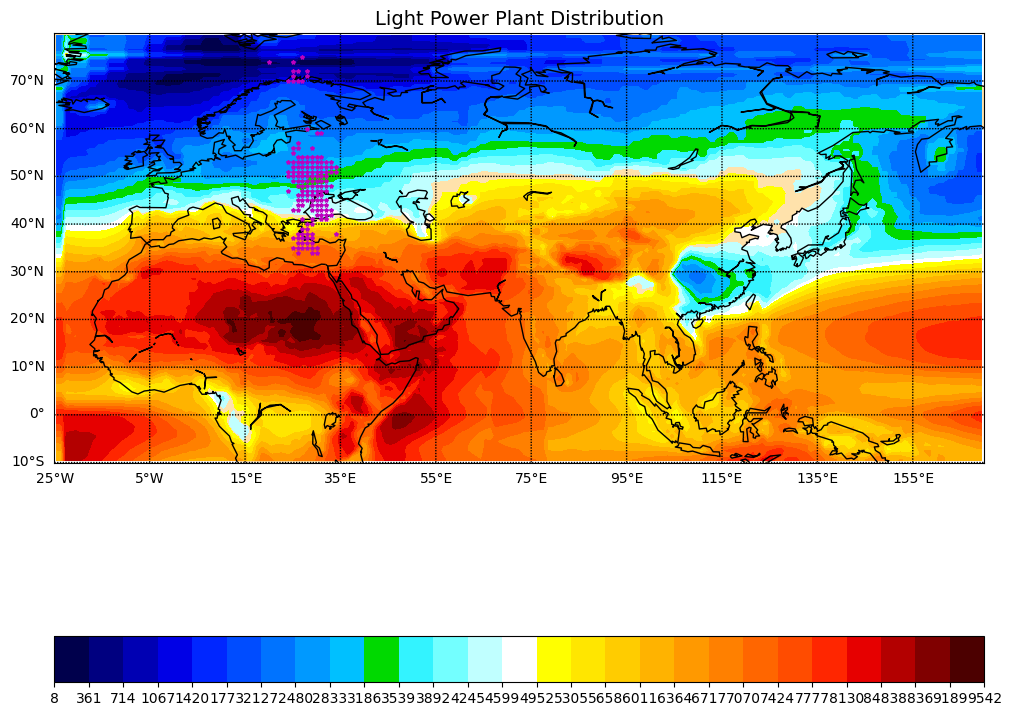

In [347]:
#这是化全球范围的图
fig = plt.figure(figsize=[12,15])  # 新窗口
ax = fig.add_subplot(1, 1, 1)  # 添加子图
ax.set_title('Light Power Plant Distribution', fontsize=14)
 
map = Basemap(projection='cyl',llcrnrlat=-10,urcrnrlat=80, llcrnrlon=-25,urcrnrlon=170,resolution='c', ax=ax)
map.drawcoastlines()
map.fillcontinents(color='#ffe2ab')
# 添加经纬度
map.drawparallels(np.arange(-10.,80.,10.),labels=[1,0,0,0])
map.drawmeridians(np.arange(-25.,170.,20.),labels=[0,0,0,1])
map.plot(plant_data['longitude'],plant_data['latitude'], 'm*', markersize=3) 
# 经度范围设置为[-180,180]
VO, lons = shiftgrid(169.,data,lon,start=False)
llons, llats = np.meshgrid(lon, lat)
x,y = map(llons,llats)
# 设置色阶
cmap = c.ListedColormap(['#00004c','#000080','#0000b3','#0000e6','#0026ff','#004cff',
                         '#0073ff','#0099ff','#00c0ff','#00d900','#33f3ff','#73ffff','#c0ffff', 
                         (0,0,0,0),
                         '#ffff00','#ffe600','#ffcc00','#ffb300','#ff9900','#ff8000','#ff6600',
                         '#ff4c00','#ff2600','#e60000','#b30000','#800000','#4c0000'])
bounds=np.linspace(data.min(),data.max(),28)
# bounds=[0,100,200,300,400,500,600,700,800,1000]
norm = c.BoundaryNorm(bounds, ncolors=cmap.N) 
cs = map.contourf(x,y,VO, cmap=cmap, norm=norm, levels=bounds,shading='interp')
# 添加颜色条
fig.colorbar(cs, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, ax=ax, orientation='horizontal')
fig.savefig("./feature_enerage.jpg")

/tmp/ipykernel_18032/2230121974.py:26: UserWarning: The following kwargs were not used by contour: 'shading'
  cs = map.contourf(x,y,VO, cmap=cmap, norm=norm, levels=bounds,shading='interp')


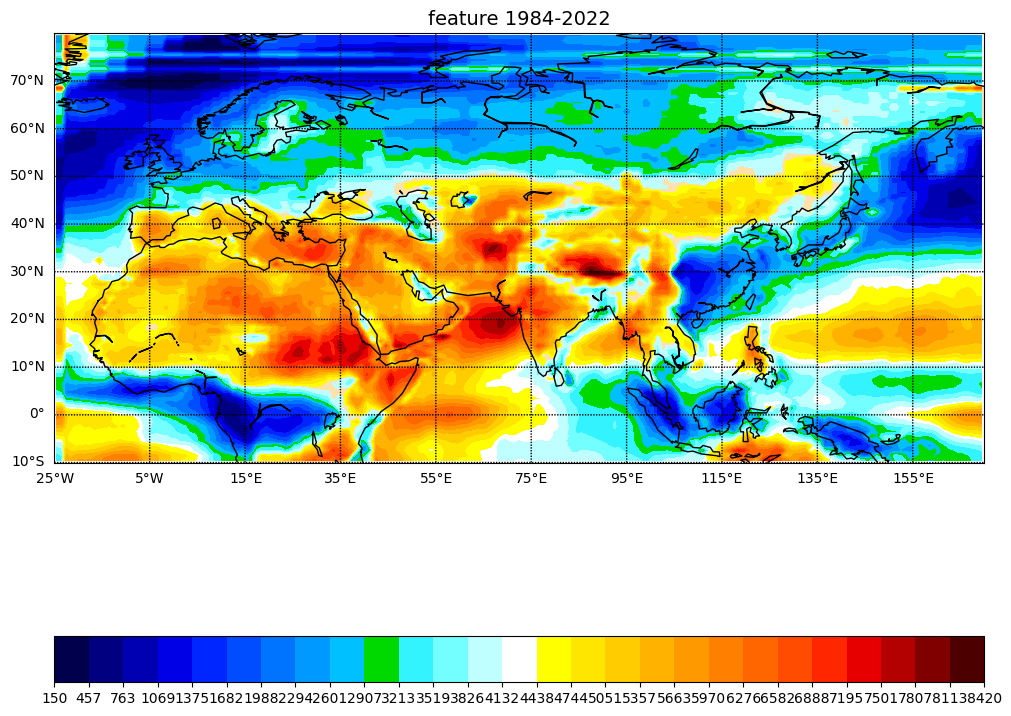

In [203]:
#这是化全球范围的图
fig = plt.figure(figsize=[12,15])  # 新窗口
ax = fig.add_subplot(1, 1, 1)  # 添加子图
ax.set_title('feature 1984-2022', fontsize=14)
 
map = Basemap(projection='cyl',llcrnrlat=-10,urcrnrlat=80, llcrnrlon=-25,urcrnrlon=170,resolution='c', ax=ax)
map.drawcoastlines()
map.fillcontinents(color='#ffe2ab')
# 添加经纬度
map.drawparallels(np.arange(-10.,80.,10.),labels=[1,0,0,0])
map.drawmeridians(np.arange(-25.,170.,20.),labels=[0,0,0,1])
# map.plot(plant_data['longitude'],plant_data['latitude'], 'bo', markersize=0.5) 
# 经度范围设置为[-180,180]
VO, lons = shiftgrid(169.,data,lon,start=False)
llons, llats = np.meshgrid(lon, lat)
x,y = map(llons,llats)
# 设置色阶
cmap = c.ListedColormap(['#00004c','#000080','#0000b3','#0000e6','#0026ff','#004cff',
                         '#0073ff','#0099ff','#00c0ff','#00d900','#33f3ff','#73ffff','#c0ffff', 
                         (0,0,0,0),
                         '#ffff00','#ffe600','#ffcc00','#ffb300','#ff9900','#ff8000','#ff6600',
                         '#ff4c00','#ff2600','#e60000','#b30000','#800000','#4c0000'])
bounds=np.linspace(data.min(),data.max(),28)
# bounds=[0,100,200,300,400,500,600,700,800,1000]
norm = c.BoundaryNorm(bounds, ncolors=cmap.N) 
cs = map.contourf(x,y,VO, cmap=cmap, norm=norm, levels=bounds,shading='interp')
# 添加颜色条
fig.colorbar(cs, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, ax=ax, orientation='horizontal')

In [96]:
# 陆地 - 内蒙古
ds_sea.GWETTOP[500][270][453].values


array(0.203125)

In [97]:
# 陆地 - 日本
ds_sea.GWETTOP[500][250][510].values

array(0.9140625)

In [98]:
# 海洋 - 北太平洋
ds_sea.GWETTOP[500][240][560].values


array(1.)

In [99]:
# 海洋 - 北大西洋
ds_sea.GWETTOP[500][240][225].values

array(1.)